<a href="https://colab.research.google.com/github/mspatke/Deep-Learning-with-Tensorflow/blob/main/dogs_vs_cats_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))


num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr

total_validation = num_cats_val + num_dogs_val

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print("---------------------------------")
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("---------------------------------")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training cat images: 1000
total training dog images: 1000
---------------------------------
total validation cat images: 500
total validation dog images: 500
---------------------------------
Total training images: 2000
Total validation images: 1000


In [11]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [12]:
#Data Preparation

train_image_generator = ImageDataGenerator(rescale= 1.0/255. )
validation_image_generator = ImageDataGenerator(rescale= 1.0/255. )

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle= True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode= 'binary')


Found 2000 images belonging to 2 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle= True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode= 'binary')


Found 1000 images belonging to 2 classes.


In [16]:
sample_training_images,_ = next(train_data_gen)

In [20]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

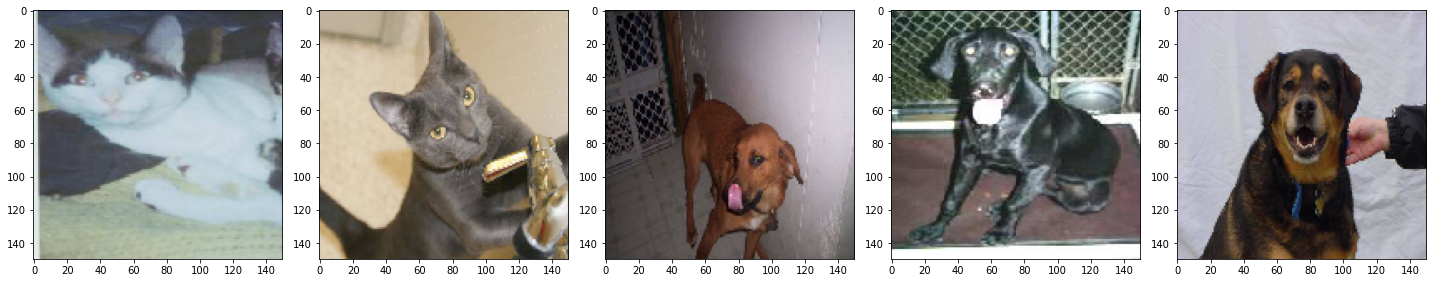

In [21]:
plotImages(sample_training_images[:5])

In [36]:
#Model Creation:

model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
from tensorflow.keras.optimizers import RMSprop

In [49]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# model.compile(loss = 'binary_crossentropy',
#               optimizer = RMSprop(lr=0.001),
#               metrics = ['accuracy'])  #'accuracy ' it will be 'accuracy'


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [51]:
EPOCHS = 20

history = model.fit(train_data_gen,
                    validation_data=val_data_gen,
                    steps_per_epoch=10,
                    epochs=EPOCHS,
                    validation_steps=5)


Epoch 1/20
10/10 [==============================] - 6s 601ms/step - loss: 0.5731 - accuracy: 0.7100 - val_loss: 0.7007 - val_accuracy: 0.5780
Epoch 2/20
10/10 [==============================] - 6s 563ms/step - loss: 0.5680 - accuracy: 0.7110 - val_loss: 0.6134 - val_accuracy: 0.6840
Epoch 3/20
10/10 [==============================] - 5s 560ms/step - loss: 0.5256 - accuracy: 0.7290 - val_loss: 0.7033 - val_accuracy: 0.5860
Epoch 4/20
10/10 [==============================] - 6s 574ms/step - loss: 0.5781 - accuracy: 0.7070 - val_loss: 0.6456 - val_accuracy: 0.6360
Epoch 5/20
10/10 [==============================] - 6s 566ms/step - loss: 0.5024 - accuracy: 0.7550 - val_loss: 0.7800 - val_accuracy: 0.6020
Epoch 6/20
10/10 [==============================] - 6s 563ms/step - loss: 0.4754 - accuracy: 0.7710 - val_loss: 0.6030 - val_accuracy: 0.7040
Epoch 7/20
10/10 [==============================] - 6s 641ms/step - loss: 0.4472 - accuracy: 0.7750 - val_loss: 0.6385 - val_accuracy: 0.7060
Epoch 

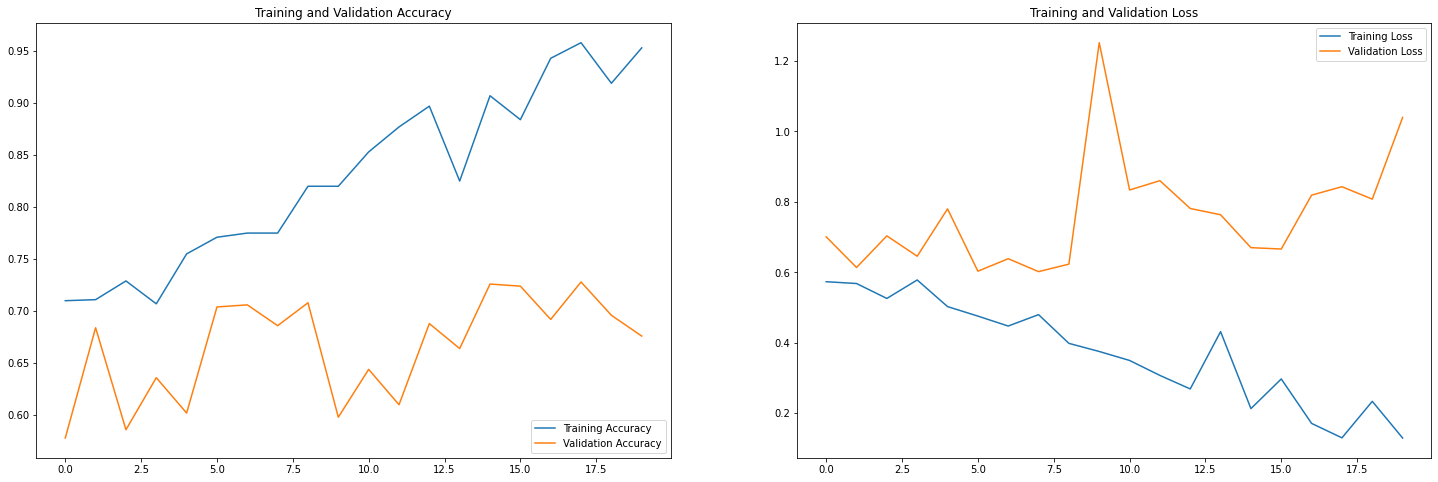

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()